In [61]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

sns.set_style(style="darkgrid")

In [62]:
data = pd.read_csv('../data/fifa.csv').drop('Unnamed: 0', axis=1)

In [63]:
data.shape

(18207, 88)

### 1. For this exercise, we drop the players whose heights or weights are nan. Draw a scatter plot of the players’ heights and weights with x-axis being heights (in inches) and y-axis being weights (in lbs). What is the correlation between these two variables? Fit a simple linear regression model using the standardized heights and standardized weights (weights as dependent variable). Verify that the slope of the fitted line is equal to the correlation we just calculated.

### drop the players whose heights or weights are nan.

In [64]:
data[['Height', 'Weight']].head()

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [65]:
df = data.dropna(axis=0, subset=['Height','Weight'], how='any').copy()

In [66]:
def convert_height(height):
    return int(height.split("'")[0]) * 12 + int(height.split("'")[1])

df['Height_convert'] = df['Height'].apply(convert_height)
df['Weight_convert'] = df['Weight'].str.strip('lbs').astype(int)

In [67]:
df['Weight'].str.strip('lbs').astype(int)

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18159, dtype: int32

In [68]:
df[['Height', 'Height_convert', 'Weight', 'Weight_convert']].head()

,Height,Height_convert,Weight,Weight_convert
0,5'7,67,159lbs,159
1,6'2,74,183lbs,183
2,5'9,69,150lbs,150
3,6'4,76,168lbs,168
4,5'11,71,154lbs,154


### Draw a scatter plot of the players’ heights and weights with x-axis being heights (in inches) and y-axis being weights (in lbs).

Text(0, 0.5, 'Weight (in lbs)')

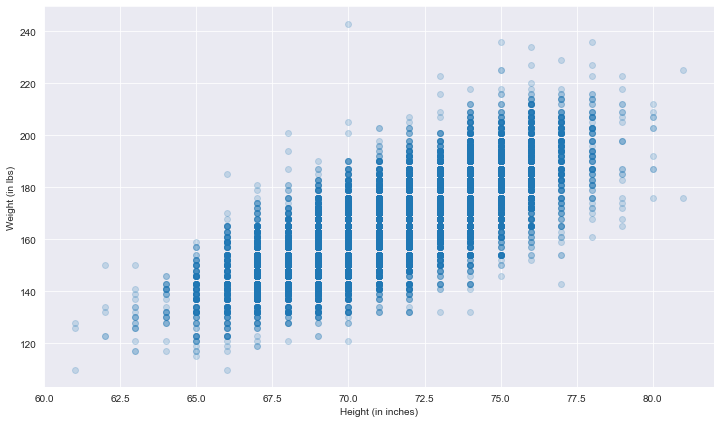

In [69]:
plt.figure(figsize=(12,7))
plt.scatter('Height_convert', 'Weight_convert', data=df, alpha=0.2)
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in lbs)')

In [70]:
#Correlation coefficient
df['Height_convert'].corr(df['Weight_convert'])

0.75467821632847

### Fit a simple linear regression model using the standardized heights and standardized weights (weights as dependent variable)

In [71]:
def standarize_series(data_series): 
    # Standardized the data, could applied the scale funtion from sklearn package to achieve this directly
    return (data_series - data_series.mean()) / data_series.std()

df['height_scale'] = standarize_series(df['Height_convert'])
df['weight_scale'] = standarize_series(df['Weight_convert'])

In [72]:
df['Height'].head(2)

0    5'7
1    6'2
Name: Height, dtype: object

In [73]:
# weight_scale = beta_0 + beta_1 * height_scale
lm1 = smf.ols('weight_scale ~ height_scale ', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weight_scale   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 2.402e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:32:46   Log-Likelihood:                -18113.
No. Observations:               18159   AIC:                         3.623e+04
Df Residuals:                   18157   BIC:                         3.625e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.996e-16      0.005   1.03e-13      1.000      -0.010       0.010
height_scale     0.7547      0.005    154.995      0.000       0.745       0.764
==============================================================================
Omnibus:                      255.118   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.360
Skew:                           0.076   Prob(JB):                     1.32e-99
Kurtosis:                       3.761   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# weight_scale = beta_1 * (height_scale - 1)
lm1 = smf.ols('weight_scale ~ height_scale - 1', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           weight_scale   R-squared (uncentered):                   0.570
Model:                            OLS   Adj. R-squared (uncentered):              0.570
Method:                 Least Squares   F-statistic:                          2.402e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                        0.00
Time:                        17:39:37   Log-Likelihood:                         -18113.
No. Observations:               18159   AIC:                                  3.623e+04
Df Residuals:                   18158   BIC:                                  3.624e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
height_scale     0.7547      0.005    154.999      0.000       0.745       0.764
==============================================================================
Omnibus:                      255.118   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.360
Skew:                           0.076   Prob(JB):                     1.32e-99
Kurtosis:                       3.761   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# weight_scale = beta_0 + beta_1 * height_scale
lm1 = smf.ols('weight_scale ~ np.log(height_scale)', data=df).fit()
lm1.summary()

C:\Users\usman_akram\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weight_scale   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     3444.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:40:11   Log-Likelihood:                -9493.9
No. Observations:                8915   AIC:                         1.899e+04
Df Residuals:                    8913   BIC:                         1.901e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8902      0.009    103.067      0.000       0.873       0.907
np.log(height_scale)     0.5776      0.010     58.689      0.000       0.558       0.597
==============================================================================
Omnibus:                       60.134   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.777
Skew:                           0.032   Prob(JB):                     3.20e-20
Kurtosis:                       3.488   Cond. No.                         1.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
len(np.unique(df['Nationality']))

164

In [77]:
lm1 = smf.ols('weight_scale ~ C(Nationality)', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weight_scale   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     8.812
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          3.74e-193
Time:                        17:41:11   Log-Likelihood:                -25069.
No. Observations:               18159   AIC:                         5.047e+04
Df Residuals:                   17995   BIC:                         5.175e+04
Df Model:                         163                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -1.0728      0.483     -2.220      0.026      -2.020      -0.125
C(Nationality)[T.Albania]                  0.9706      0.508      1.912      0.056      -0.024       1.965
C(Nationality)[T.Algeria]                  1.1543      0.499      2.312      0.021       0.176       2.133
C(Nationality)[T.Andorra]                  1.5872      1.081      1.469      0.142      -0.531       3.706
C(Nationality)[T.Angola]                   1.1084      0.544      2.038      0.042       0.042       2.175
C(Nationality)[T.Antigua & Barbuda]        0.9940      0.684      1.454      0.146      -0.346       2.334
C(Nationality)[T.Argentina]                1.0527      0.484      2.173      0.030       0.103       2.002
C(Nationality)[T.Armenia]                  1.1191      0.572      1.957      0.050      -0.002       2.240
C(Nationality)[T.Australia]                1.1033      0.487      2.263      0.024       0.148       2.059
C(Nationality)[T.Austria]                  1.2297      0.487      2.527      0.012       0.276       2.184
C(Nationality)[T.Azerbaijan]               1.4205      0.648      2.191      0.029       0.149       2.692
C(Nationality)[T.Barbados]                 2.1216      0.738      2.874      0.004       0.674       3.569
C(Nationality)[T.Belarus]                  1.4109      0.684      2.064      0.039       0.071       2.751
C(Nationality)[T.Belgium]                  1.2284      0.487      2.522      0.012       0.274       2.183
C(Nationality)[T.Belize]                   2.0361      1.081      1.884      0.060      -0.082       4.155
C(Nationality)[T.Benin]                    1.6556      0.544      3.044      0.002       0.589       2.722
C(Nationality)[T.Bermuda]                  1.0421      0.837      1.245      0.213      -0.599       2.683
C(Nationality)[T.Bolivia]                  0.5697      0.515      1.107      0.268      -0.439       1.578
C(Nationality)[T.Bosnia Herzegovina]       1.4800      0.499      2.966      0.003       0.502       2.458
C(Nationality)[T.Botswana]                -0.6573      1.081     -0.608      0.543      -2.776       1.461
C(Nationality)[T.Brazil]                   1.1755      0.485      2.426      0.015       0.226       2.125
C(Nationality)[T.Bulgaria]                 0.8517      0.513      1.661      0.097      -0.153       1.857
C(Nationality)[T.Burkina Faso]             0.7415      0.540      1.372      0.170      -0.318       1.801
C(Nationality)[T.Burundi]                  1.2666      0.738      1.715      0.086      -0.181       2.714
C(Nationality)[T.Cameroon]                 1.5281      0.494      3.093      0.002       0.560       2.496
C(Nationality)[T.Canada]                   1.3297      0.498      2.669      0.008     

In [78]:
df.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Height_convert,Weight_convert,height_scale,weight_scale
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,6.0,11.0,15.0,14.0,8.0,€226.5M,67,159,-1.645965,-0.447571
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,7.0,11.0,15.0,14.0,11.0,€127.1M,74,183,0.995880,1.091547


In [79]:
lm1 = smf.ols('weight_scale ~ Age * Potential', data=df).fit() #interaction term
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weight_scale   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     362.9
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          6.25e-229
Time:                        17:41:58   Log-Likelihood:                -25237.
No. Observations:               18159   AIC:                         5.048e+04
Df Residuals:                   18155   BIC:                         5.051e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2007      0.460     -0.436      0.663      -1.103       0.701
Age              -0.0178      0.018     -0.985      0.325      -0.053       0.018
Potential        -0.0156      0.006     -2.439      0.015      -0.028      -0.003
Age:Potential     0.0010      0.000      3.898      0.000       0.000       0.001
==============================================================================
Omnibus:                      135.412   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.961
Skew:                           0.205   Prob(JB):                     6.68e-31
Kurtosis:                       3.121   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
lm1 = smf.ols('weight_scale ~ Age : Potential', data=df).fit() #interaction term
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weight_scale   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1023.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          2.25e-218
Time:                        17:43:18   Log-Likelihood:                -25268.
No. Observations:               18159   AIC:                         5.054e+04
Df Residuals:                   18157   BIC:                         5.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2528      0.040    -31.451      0.000      -1.331      -1.175
Age:Potential     0.0007    2.2e-05     31.980      0.000       0.001       0.001
==============================================================================
Omnibus:                      133.614   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.053
Skew:                           0.204   Prob(JB):                     1.73e-30
Kurtosis:                       3.120   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
Release Clause    1516
Height_convert       0
Weight_convert       0
height_scale         0
weight_scale         0
Length: 92, dtype: int64

In [82]:
lm1 = smf.ols('weight_scale ~ Age ', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weight_scale   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):          5.15e-217
Time:                        17:43:42   Log-Likelihood:                -25272.
No. Observations:               18159   AIC:                         5.055e+04
Df Residuals:                   18157   BIC:                         5.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2383      0.040    -31.340      0.000      -1.316      -1.161
Age            0.0493      0.002     31.877      0.000       0.046       0.052
==============================================================================
Omnibus:                      139.534   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.113
Skew:                           0.210   Prob(JB):                     8.38e-32
Kurtosis:                       3.114   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Slope of the fitted line equals the correlation coefficient

In [83]:
#Correlation coefficient
df['height_scale'].corr(df['weight_scale'])

0.7546782163284692

In [84]:
# slope of the fitted line
lm1.params[1] 

0.04929012307176585

####  Relationship between R2 and the correlation coefficient of actual and fitted values

Ref: https://en.wikipedia.org/wiki/Coefficient_of_determination#As_squared_correlation_coefficient
> In linear least squares multiple regression with an estimated intercept term, $R^2$ equals the 
> square of the Pearson correlation coefficient between the observed and modeled (predicted) data values of the dependent variable.

In [85]:
# R-squared value
lm1.rsquared

0.05299797037506848

In [86]:
# The difference should be ~zero
fitted_values = lm1.fittedvalues
abs(df['weight_scale'].corr(lm1.fittedvalues) ** 2 - lm1.rsquared)

2.0816681711721685e-17

### 2. Fit a simple linear regression to players’ heights and weights in their original scales (no standardization) with weight as dependent variable. What is the R2 score? What is the correlation between the true weights and the predicted weights using the fitted linear regression model and how is it related to the R2 score?


In [87]:
lm2 = smf.ols('Weight_convert ~ Height_convert', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Weight_convert   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 2.402e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:47:37   Log-Likelihood:                -67993.
No. Observations:               18159   AIC:                         1.360e+05
Df Residuals:                   18157   BIC:                         1.360e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -150.9578      2.046    -73.774      0.000    -154.969    -146.947
Height_convert     4.4413      0.029    154.995      0.000       4.385       4.497
==============================================================================
Omnibus:                      255.118   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.360
Skew:                           0.076   Prob(JB):                     1.32e-99
Kurtosis:                       3.761   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
lm2.rsquared

0.5695392102007204

In [89]:
abs(df['Weight_convert'].corr(lm2.fittedvalues) ** 2 - lm2.rsquared)

7.771561172376096e-16

### 3. Assuming iid Gaussian noise, give the 95 percent confidence interval for the slope of the linear regression line in question 2.


In [90]:
lm2.conf_int(alpha=0.05)

,0,1
Intercept,-154.968593,-146.946975
Height_convert,4.385137,4.497468


### 4. On top of the scatter plot drawn in question 1/, plot the fitted linear regression line from question 2/, and plot the 95 percent confidence intervals for the linear regression line and the 95 percent prediction intervals.

- confidence interval: how likely you have determined the mean
- prediction intervals: a range likely contains the value of dependent variable for a single new observation given specific values of the independent variable -> consider individual observation, rather than the population mean

In [91]:
newx = {
    'Height_convert': np.arange(df['Height_convert'].min(), df['Height_convert'].max(), 0.1)
}
newx = pd.DataFrame(newx)
lm2.get_prediction(newx).summary_frame(alpha=1 - 0.95)

# obs: Individual observation at X point
# mean: Mean of points at X point

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,119.961668,0.306451,119.360996,120.562341,99.898949,140.024388
1,120.405799,0.303675,119.810566,121.001031,100.343241,140.468356
2,120.849929,0.300902,120.260133,121.439725,100.787532,140.912326
3,121.294059,0.298130,120.709696,121.878422,101.231821,141.356297
4,121.738189,0.295360,121.159256,122.317123,101.676109,141.800270
...,...,...,...,...,...,...
195,206.567067,0.272651,206.032646,207.101488,186.506222,226.627913
196,207.011197,0.275404,206.471380,207.551015,186.950207,227.072187
197,207.455328,0.278159,206.910109,208.000546,187.394191,227.516464
198,207.899458,0.280917,207.348834,208.450082,187.838174,227.960741


Confidence interval of predictions are usually broader than confidence interval of parameters

Text(0, 0.5, 'Weight (in lbs)')

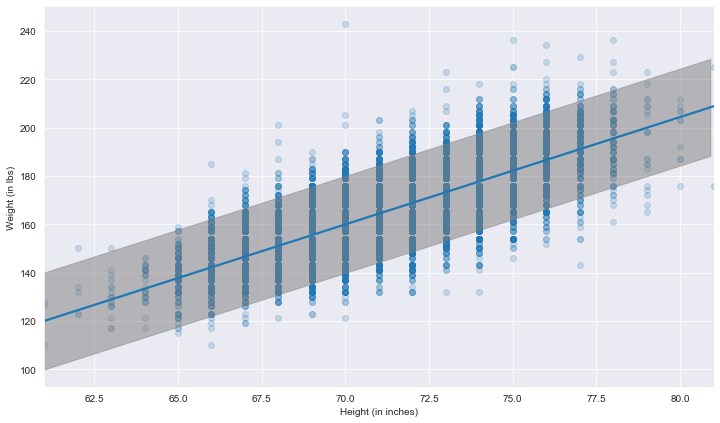

In [92]:
# ci: Size of the confidence interval for the regression estimate.
ci = 0.95

newx = {
    'Height_convert': np.arange(df['Height_convert'].min(), df['Height_convert'].max(), 0.1)
}
newx = pd.DataFrame(newx)
plt.figure(figsize=(12, 7))
sns.regplot('Height_convert', 'Weight_convert', data=df, scatter_kws={'alpha':0.2}, ci=ci)


#  draw the prediction interval
prediction_summary = lm2.get_prediction(newx).summary_frame(alpha=1 - ci)
plt.fill_between(newx['Height_convert'],
                 prediction_summary['obs_ci_lower'],
                 prediction_summary['obs_ci_upper'],
                 color='grey', 
                 alpha=0.5, 
                 interpolate=True)
plt.xlabel('Height (in inches)')
plt.ylabel('Weight (in lbs)')

### 5. For this question, let’s filter the data by Value >= $50K and Overall >= 60. Draw the scatter plot of Value and Overall with Value on the y-axis. Fit a simple linear regression model on Value vs Overall (Value as dependent variable) and draw the residual plot. How do you think the simple linear model performs here? What is the R2 score? Now, take the log of the variable ‘Value’ and fit a simple linear regression using ‘log_Value’ and Overall. Draw the residual plot and calculate the R2 score.


### filter the data by Value >= $50K and Overall >= 60

In [93]:
def convert_str_value_to_numeric(str_value):
    if str_value in ['NaN', 'nan', np.nan]:
        return np.nan
    else:
        if str_value.endswith('K'):
            multiplier = 1
        elif str_value.endswith('M'):
            multiplier = 1000
        else:
            multiplier = 1
        
        re_pattern = re.compile('[^0-9\.\-]')
        return float(re.sub(re_pattern, '', str_value)) * multiplier

In [94]:
df['Value_trans'] = df['Value'].apply(convert_str_value_to_numeric)
df['Wage_trans'] = df['Wage'].apply(convert_str_value_to_numeric)

In [95]:
filtered_df = df[(df['Value_trans'] >= 50) & (df['Overall'] >= 60)].copy()

### Draw the scatter plot of Value and Overall with Value on the y-axis. 

Text(0, 0.5, 'Value')

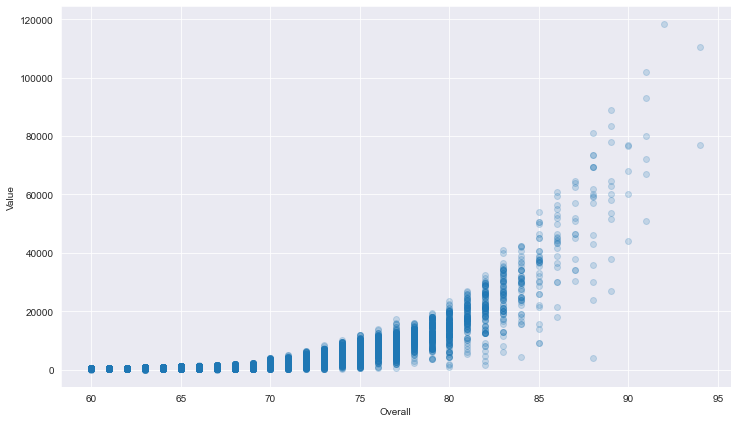

In [96]:
plt.figure(figsize=(12, 7))
plt.scatter(y='Value_trans', x='Overall', data=filtered_df, alpha=0.2)
plt.xlabel('Overall')
plt.ylabel('Value')

### Fit a simple linear regression model on Value vs Overall (Value as dependent variable) 

In [97]:
lm3 = smf.ols('Value_trans ~ Overall', data=filtered_df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Value_trans   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                 1.602e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:52:32   Log-Likelihood:            -1.4650e+05
No. Observations:               15004   AIC:                         2.930e+05
Df Residuals:                   15002   BIC:                         2.930e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.142e+04    430.539   -119.430      0.000   -5.23e+04   -5.06e+04
Overall      795.5120      6.286    126.560      0.000     783.191     807.833
==============================================================================
Omnibus:                    19777.767   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6165139.212
Skew:                           7.308   Prob(JB):                         0.00
Kurtosis:                     101.224   Cond. No.                         858.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Print the R-square

In [98]:
lm3.rsquared

0.5163687882968184

### draw the residual plot

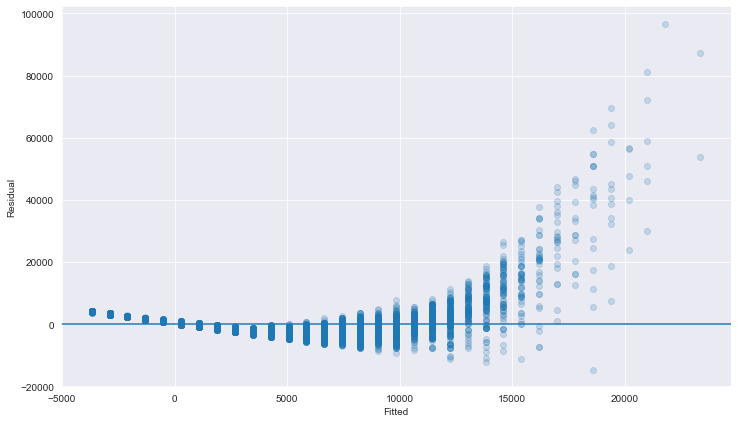

In [99]:
plt.figure(figsize=(12, 7))
plt.scatter(x=lm3.fittedvalues, y=lm3.resid, alpha=0.2)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.axhline(y=0)

### Take the log of the variable ‘Value’ and fit a simple linear regression using ‘log_Value’ and Overall. Draw the residual plot and calculate the R2 score.

In [100]:
filtered_df['log_value'] = np.log(filtered_df['Value_trans'])

In [101]:
lm4 = smf.ols('log_value ~ Overall', data=filtered_df).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 8.704e+04
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:53:57   Log-Likelihood:                -9932.9
No. Observations:               15004   AIC:                         1.987e+04
Df Residuals:                   15002   BIC:                         1.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.0326      0.048   -146.583      0.000      -7.127      -6.939
Overall        0.2066      0.001    295.022      0.000       0.205       0.208
==============================================================================
Omnibus:                     5014.803   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21675.360
Skew:                          -1.594   Prob(JB):                         0.00
Kurtosis:                       7.950   Cond. No.                         858.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
lm4.rsquared

0.8529788609536011

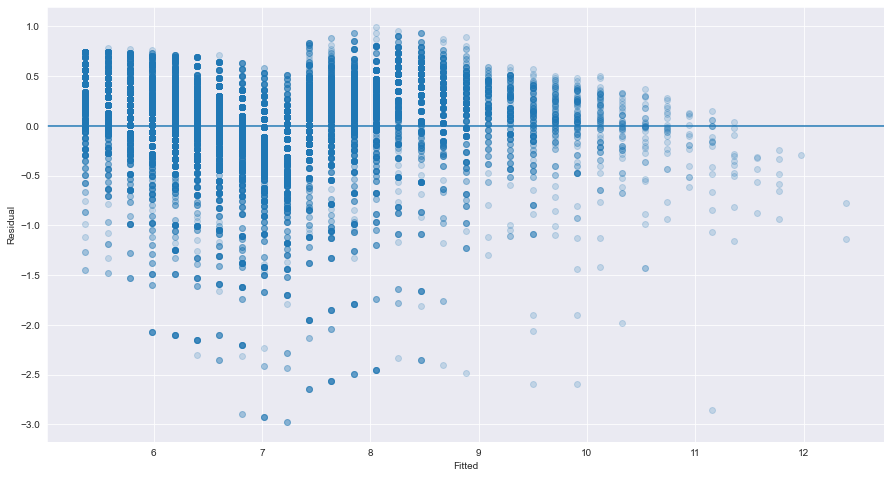

In [103]:
plt.figure(figsize=(15,8))
plt.scatter(x=lm4.fittedvalues, y=lm4.resid, alpha=0.2)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.axhline(y=0)

#### Observation from the Residual Plots
- For the first residual plot, there are some non-linear patterns not captured by the model.
- After the log transformation (2nd residual plot), there is less such effect.

## Appendix - Confidence Intevals, Predition Intervals

- We provide some derivations below for people who want to understand better what statsmodels calculates behind the scenes for confidence intervals / prediction intervals. There is no need to perform the below calculations in practice and using statsmodels is sufficient. 

- Also, https://rpubs.com/aaronsc32/regression-confidence-prediction-intervals is a helpful resource if you are interested in what kind of questions are answered by confidence intervals vs. prediction intervals.

Let's use the same data, x, y variables that we used to answer question 4 above

In [104]:
X = df['Height_convert'].values

# Add a column vector of ones for intercept
X = np.vstack((np.ones_like(X), X)).T

In [105]:
y = df['Weight_convert'].values

In [106]:
X.shape, y.shape

((18159, 2), (18159,))

In [107]:
x_t_x = X.T.dot(X)
x_t_y = X.T.dot(y)

# beta_hat is the OLS estimator 
# vector of size 2 - first element is the intercept, second element is the slope coeffcient
beta_hat = np.linalg.inv(x_t_x).dot(x_t_y)

# Now that we have OLS estimator, beta_hat, we can calculate y_hat, or the fitted value of y
# and the residuals
y_hat = X.dot(beta_hat)
resids = y - y_hat

In [108]:
# Below are std dev and variance of residuals
std_eps = resids.std(ddof=2)
var_eps = std_eps ** 2

In [109]:
# Below is the covariance matrix for beta_hat
# Beta_hat is an estimate of the true beta and thus can fluctuate (is random)
beta_hat_cov = var_eps * np.linalg.inv(x_t_x)

In [110]:
beta_hat

array([-150.95778405,    4.4413025 ])

In [111]:
# Compare with statsmodels for sanity check
lm2.params

Intercept        -150.957784
Height_convert      4.441302
dtype: float64

Now lets suppose you have a new data called x0 that represents height=70inches and you would like to get its, prediction of weight and confidence / prediction intervals (using the relationship we fitted above)

In [112]:
height_0 = 70
x0 = np.array([1, height_0])  # 1 is added for the intercept term

In [113]:
y_hat_0 = x0.dot(beta_hat)

Let's find the standard error of the 'predicted mean of y' or the y_hat_0 given x0

In [114]:
var_y_hat_0 = (x0.T).dot(beta_hat_cov).dot(x0)
std_y_hat_0 = np.sqrt(var_y_hat_0)

Let's find the standard error of the 'predicted y' or y_0 given x0
Note that this has additional variance since we now are interested in the range of observation y_0 itself (and not just its mean) so we need to take into account the residual variance. The result would be that prediction interval is always wider than confidence interval

In [115]:
var_y_0 = var_y_hat_0 + var_eps
std_y_0 = np.sqrt(var_y_0)

Now we have all the ingredients - let's find out the confidence / prediction interval at 95% confidence level

In [116]:
from scipy.stats import t

In [117]:
confidence_level = 0.95

ddof = X.shape[0] - 2
t_critical = t.ppf(1 - (1 - confidence_level) / 2, df=ddof)

In [118]:
confidence_interval = y_hat_0 - t_critical * std_y_hat_0, y_hat_0 + t_critical * std_y_hat_0

prediction_interval = y_hat_0 - t_critical * std_y_0, y_hat_0 + t_critical * std_y_0

Our result:

In [119]:
y_hat_0, confidence_interval, prediction_interval

(159.933390800888,
 (159.76608387427905, 160.10069772749694),
 (139.87896713401548, 179.9878144677605))

Statsmodels result:

In [120]:
lm2.get_prediction({'Height_convert': height_0}).summary_frame(alpha=1 - confidence_level)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,159.933391,0.085357,159.766084,160.100698,139.878967,179.987814


We can see that we achieve the same result as from statsmodels (confidence interval corresponds to 'mean_ci' fields and prediction interval corresponds to 'obs_ci' columns in statsmodels)